<h1 style="color:blue">Praktikum 4. </h1>
<h3 style="color:blue">Lihtne andme- ja tekstianalüütika Pythonis</h3>

Selles praktikumis tutvume tabelkujul olevate andmete töötluse võimalustega Pythonis.

<h3 style="color:green">csv - Comma Separated Values</h3>

csv formaat on väga levinud andmete säilitamiseks tabelkujul. Võite proovida avada andmefaili MS Exceli või muu tabelitöötlusprogrammiga - enne avamist küsib programm üle, mida kasutada **eraldajana**. Ehk mis märk eraldab veerge üksteisest failis. Nagu nime järgi võib oletada, on standardseks eraldajaks koma. 

CSV-failid talletavad lihttekstilise tabeli kujul andmeid, kus rea defineerib üldiselt reavahetuse sümbol ning veeru ettemääratud eraldusmärk. Kui tekstilised tunnused sisaldavad reavahetuse sümbolit või veeru eraldajat, piiritletakse tunnuse väärtus jutumärkidega (""). Traditsiooniliselt kasutatakse veergude eralduseks koma, reavahetuseks süsteemi reavahetuse sümbolite jada ning jutumärgiks jutumärki " . Kuna CSV pole aga standardiseeritud, võib kohata väga erinevaid kujusid, mistõttu CSV-dega töötavad süsteemid võimaldavad kasutajal määrata erinevaid formaadi parameetreid.

CSV talletab struktureeritud andmeid (igal andmepunktil - näiteks raamatul, tootel, kasutajal - on fikseeritud tunnused), mistõttu on see ajalooliselt käinud käsikäes andmebaaside ja meie aine valdkonnas ka masinõppemeetoditega. CSV hiilgab kompaktsuse ning platvormist sõltumatusega (kui välja jätta standardiseerimatus). CSV-ga töötamiseks on Pythonis olemas [_csv_ teek](https://docs.python.org/3/library/csv.html).

_csv_ teek lubab nii lugeda kui kirjutada CSV formaadis faile. Andmeridadega manipuleerimiseks saab kasutada kas ühetasemelisi itereeritavaid andmestruktuure (nt _list_ või _tuple_) või sõnaraamatuid.

In [1]:
import csv
with open('ilusad_inimesed.csv') as csv_file:
    rows = []
    
    reader = csv.reader(csv_file)
    header = next(reader)
    rows.append(header)
    
    print(header)
    print()
    
    for row in reader:
        rows.append(row)
        print(row)

['nimi', 'sugu', 'vanus']

['Teele', 'naine', '25']
['Ivan', 'mees', '87']
['Arfi', 'mees', '12']
['Leida', 'naine', '58']


Eelnevas koodiplokis nägime, et _csv.reader()_ võimaldab lugeda CSV ridu ükshaaval, teisendades rea Pythoni sõnede listiks. Kui me teame, et mingi tunnus on sõnest erinevat tüüpi (nt täisarv, ujukomaarv või kuupäev), peame selle käsitsi vastavale kujule teisendama.

Lisaks tutvusime eelnevas plokis __iteraatorist__ järgmise elemendi pärimisega. Kõik objektid, mille saame _for_-tsüklisse pista, on itereeritavad ning pakuvad iteraatorit, mis võimaldab andmestruktuuris sisalduvaid elemente ükshaaval läbida. Iteraatoritel on üldiselt kaks meetodit - _next_ ja *has_next*. _For_-tsükkel itereerib üle andmestruktuuri, kuni andmestruktuuris on veel elemente.

Antud näites annab **next()** järgmise rea. Esimest korda kutsudes saame esimese (päise) rea. Edaspidi anname _reader_'i _for_-tsüklile, mis kutsub **next()** meetodit ülejäänud korrad ülejäänud ridade saamiseks.

In [2]:
with open('ilusad_inimesed.csv.copy','w') as csv_file:
    writer = csv.writer(csv_file)
    for row in rows:
        writer.writerow(row)

Nägime, et _csv.writer()_ võimaldab kirjutada _csv_ ridu, kui need on Pythonis itereeritaval kujul. Antud juhul olid ridadeks sõnede järjendid.

Lisaks _list_'idele saame töötada ka sõnaraamatutega (_dict_'idega).

In [3]:
with open('ilusad_inimesed.csv') as csv_file:
    rows = []
    
    reader = csv.DictReader(csv_file)
    for row in reader:
        rows.append(row)
        print(row)

{'nimi': 'Teele', 'sugu': 'naine', 'vanus': '25'}
{'nimi': 'Ivan', 'sugu': 'mees', 'vanus': '87'}
{'nimi': 'Arfi', 'sugu': 'mees', 'vanus': '12'}
{'nimi': 'Leida', 'sugu': 'naine', 'vanus': '58'}


Kui listide korral pidime esimese rea ehk päisega ise toimetama, siis sõnaraamatute korral loetakse see vaikimisi sisse ning selle veergude väärtused määratakse ülejäänud ridade veergude nimedeks.

**Ettevaatust: ** kui CSV-l puudub päis, lähevad salaja esimese rea andmed kaduma.

In [4]:
with open('ilusad_inimesed.csv.copy','w') as csv_file:
    fieldnames = [fieldname for fieldname in rows[0]]
    print("Fieldnames:", fieldnames)
    
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for row in rows:
        writer.writerow(row)

Fieldnames: ['nimi', 'sugu', 'vanus']


_csv_ teek sobib eelkõige CSV formaadis kirjutamiseks ja lugemiseks. Kui on soovi keerulisemaid või suuremaid numbrilisi tabelitöötlusi teha, osutub kasulikuks [pandas](http://pandas.pydata.org/)'e teek.

### Ülesanne 1. Tsensuur (1,5p)
Failis comments.csv on toodud 200 lugejakommentaari ühest eesti meediaväljaandest. Veerus "Staatus" on märgitud, kas moderaator on kommentaari ära keelanud (staatus 1) või mitte (staatus 2). Veergudes "Pos" ja "Neg" on kirjas, kui palju on kommentaar saanud lugejatelt vastavalt positiivseid ja negatiivseid hinnanguid.

Lugege fail sisse, kasutades csv teeki, ning leidke:

1) Millised 10 kommentaari on pälvinud kõige enam hindeid lugejatelt? (0,5p)

2) Kas lugejad ja moderaatorid on ühel meelel kommentaaride sobilikkuse osas: milline osakaal moderaatori poolt keelatud kommentaaridest on saanud lugejatelt rohkem negatiivseid hääli kui positiivseid? Milline osakaal lubatud kommentaaridest? (1p)

###  Pandas

[Pandas](http://pandas.pydata.org/) on Pythoni teek, mis võimaldab mugavalt töödelda tabelkujul olevaid andmeid - muuhulgas ka lugeda-kirjutada csv faile. Vaatame järgmist näidet:

In [5]:
import pandas as pd

In [6]:
ilusad_inimesed = pd.read_csv("ilusad_inimesed.csv")

In [7]:
ilusad_inimesed

,nimi,sugu,vanus
0,Teele,naine,25
1,Ivan,mees,87
2,Arfi,mees,12
3,Leida,naine,58


Nagu näeme, oskab pandas kuvada meie csv-faili ilusa tabelina. Millega tegu?

In [8]:
type(ilusad_inimesed)

pandas.core.frame.DataFrame

Mida sellega teha saab? Töödelda andmeid nii, et neid on samal ajal ka mugav vaadata.

Andmeid saab töödelda nii rea kui veeru kaupa. Mõned näited paljudest võimalikest operatsioonidest (põhjalikumat juhendit vaata [siit](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)):

In [9]:
# Veergude lisamine
ilusad_inimesed['pensionär'] = ilusad_inimesed['vanus'] > 65
ilusad_inimesed['laste arv'] = 0
ilusad_inimesed['perekonnanimi'] = ['Kask', 'Smirnov', 'Jalakas', 'Kuusepuu']

In [10]:
ilusad_inimesed

,nimi,sugu,vanus,pensionär,laste arv,perekonnanimi
0,Teele,naine,25,False,0,Kask
1,Ivan,mees,87,True,0,Smirnov
2,Arfi,mees,12,False,0,Jalakas
3,Leida,naine,58,False,0,Kuusepuu


In [11]:
# Veeru eemaldamine
del ilusad_inimesed['laste arv']

In [12]:
ilusad_inimesed

,nimi,sugu,vanus,pensionär,perekonnanimi
0,Teele,naine,25,False,Kask
1,Ivan,mees,87,True,Smirnov
2,Arfi,mees,12,False,Jalakas
3,Leida,naine,58,False,Kuusepuu


In [13]:
# Transponeerimine (vahetame veerud-read omavahel)
ilusad_inimesed2 = ilusad_inimesed.T

In [14]:
ilusad_inimesed2

,0,1,2,3
nimi,Teele,Ivan,Arfi,Leida
sugu,naine,mees,mees,naine
vanus,25,87,12,58
pensionär,False,True,False,False
perekonnanimi,Kask,Smirnov,Jalakas,Kuusepuu


In [15]:
# Ridade ja veergude arvu leidmine
ilusad_inimesed.shape

(4, 5)

In [16]:
ilusad_inimesed2.shape

(5, 4)

In [17]:
ilusad_inimesed

,nimi,sugu,vanus,pensionär,perekonnanimi
0,Teele,naine,25,False,Kask
1,Ivan,mees,87,True,Smirnov
2,Arfi,mees,12,False,Jalakas
3,Leida,naine,58,False,Kuusepuu


Tabelite oluliseks funktsiooniks on võimalus saada oma andmetest hea ülevaade. Selleks on pandases erinevaid filtreerimise ja sorteerimise võimalusi, millest mõnesid järgnevalt vaatame.

In [18]:
# Leiame read, kus veeru 'vanus' väärtus on suurem kui 30
ilusad_inimesed[ilusad_inimesed['vanus'] > 30]

,nimi,sugu,vanus,pensionär,perekonnanimi
1,Ivan,mees,87,True,Smirnov
3,Leida,naine,58,False,Kuusepuu


In [19]:
# Võime seada ka mitu tingimust korraga
ilusad_inimesed[(ilusad_inimesed['vanus'] < 65) & (ilusad_inimesed['sugu'] == 'naine')]

,nimi,sugu,vanus,pensionär,perekonnanimi
0,Teele,naine,25,False,Kask
3,Leida,naine,58,False,Kuusepuu


In [20]:
# Muudame sorteerimise järjekorda
ilusad_inimesed.sort_values(['vanus'], ascending = False)

,nimi,sugu,vanus,pensionär,perekonnanimi
1,Ivan,mees,87,True,Smirnov
3,Leida,naine,58,False,Kuusepuu
0,Teele,naine,25,False,Kask
2,Arfi,mees,12,False,Jalakas


Samuti on võimalik matplotlibi abiga pandase DataFrame'is olevad andmed kerge vaevaga joonisele panna. Rohkem näiteid jooniste kohta leiab näiteks siit http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot.

In [21]:
import matplotlib.pyplot as plt

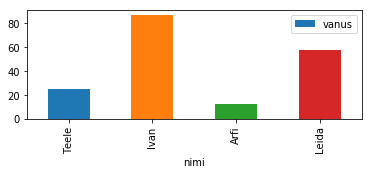

In [22]:
ilusad_inimesed.plot(kind='bar',x='nimi',y='vanus', figsize=(6,2))

In [23]:
# Lisaks veergudele võime ka ridadele numbrite asemel "nimed" panna
ilusad_inimesed.index = ['a', 'b', 'c', 'd']

In [24]:
ilusad_inimesed

,nimi,sugu,vanus,pensionär,perekonnanimi
a,Teele,naine,25,False,Kask
b,Ivan,mees,87,True,Smirnov
c,Arfi,mees,12,False,Jalakas
d,Leida,naine,58,False,Kuusepuu


In [25]:
ilusad_inimesed['nimi']['a']

'Teele'

In [26]:
# DataFrame'i võime konvertida erinevateks Pythoni sõnastikeks
ilusad_inimesed_dict = ilusad_inimesed.to_dict("split")

In [27]:
ilusad_inimesed_dict 

{'columns': ['nimi', 'sugu', 'vanus', 'pensionär', 'perekonnanimi'],
 'data': [['Teele', 'naine', 25, False, 'Kask'],
  ['Ivan', 'mees', 87, True, 'Smirnov'],
  ['Arfi', 'mees', 12, False, 'Jalakas'],
  ['Leida', 'naine', 58, False, 'Kuusepuu']],
 'index': ['a', 'b', 'c', 'd']}

In [28]:
ilusad_inimesed_dict = ilusad_inimesed.to_dict("list")

In [29]:
ilusad_inimesed_dict 

{'nimi': ['Teele', 'Ivan', 'Arfi', 'Leida'],
 'pensionär': [False, True, False, False],
 'perekonnanimi': ['Kask', 'Smirnov', 'Jalakas', 'Kuusepuu'],
 'sugu': ['naine', 'mees', 'mees', 'naine'],
 'vanus': [25, 87, 12, 58]}

In [30]:
ilusad_inimesed.values

array([['Teele', 'naine', 25, False, 'Kask'],
       ['Ivan', 'mees', 87, True, 'Smirnov'],
       ['Arfi', 'mees', 12, False, 'Jalakas'],
       ['Leida', 'naine', 58, False, 'Kuusepuu']], dtype=object)

In [31]:
# Csv-sse salvestamine käib lihtsalt
ilusad_inimesed.to_csv("test1.csv")

### Ülesanne 2. Andmete puhastamine (1p)
Failis vanasõnad.txt on toodud hulk eesti vanasõnu, mis pärinevad originaalis Anne Hussari, Arvo Krikmanni ja Ingrid Sarve "Vanasõnaraamatust" (1984), kokku on korjatud aga [siit](http://www.folklore.ee/~kriku/VSR/FRAMEST.HTM). Tutvuge toodud andmefailiga - näete, et peale vanasõnade leidub seal veel natuke üht-teist. Lisaks on osa vanasõnu kirjakeelsed, osa aga murdekeelsed. 

Kuna järgmises kahes ülesandes on vaja seda andmestikku kasutada, siis looge omale puhastatud andmefail, mis vastaks järgmistele tingimustele:
* fail on csv-formaadis
* fail sisaldab igal real üht vanasõna (ja ei midagi muud)
* fail sisaldab ainult kirjakeelseid vanasõnu

**Vihjeid**:
* ebavajaliku eemaldamisel on abiks regulaaravaldised
* murdekeelt aitab kirjakeelest eristada morfoloogiline analüsaator - kui lülitame välja oletamise, siis jätab analüsaator tundmatud sõnad analüüsimata. Seega, lisame puhastatud faili ainult laused, mille kõik sõnad saavad analüüsi ka ilma oletamiseta. 

    **NB1!** Ilma oletamiseta jäävad ka kirjavahemärgid analüüsideta, aga neid tuleks siinkohal sõnadena mitte käsitleda
    
    **NB2!** Oletamise väljalülitamine toimib ainult siis, kui lülitame välja ka ühestamise ja pärisnimeanalüüsi
    
    
* puhastatud faili jõudvate vanasõnade arv võiks olla neljakohaline, et järgmised ülesanded ka õnnestuksid

In [32]:
from estnltk import Text

In [33]:
# Morf analüüs ilma oletamiseta. 
Text("Kuda külvad, nõnna lõikad.", guess = False, disambiguate = False, propername = False).analysis

[[],
 [{'clitic': '',
   'ending': 'd',
   'form': 'd',
   'lemma': 'külvama',
   'partofspeech': 'V',
   'root': 'külva',
   'root_tokens': ['külva']}],
 [],
 [],
 [{'clitic': '',
   'ending': 'd',
   'form': 'd',
   'lemma': 'lõikama',
   'partofspeech': 'V',
   'root': 'lõika',
   'root_tokens': ['lõika']}],
 []]

### Ülesanne 3.  Lihtsad nimisõnafraasid vanasõnades (2p)
Leidke, millised nimisõnast ja omadussõnast koosnevad fraasid (nt 'sinine ämber') esinevad eesti vanasõnades. Looge csv fail, milles niisuguste fraaside sagedused vanasõnades oleks esitatud risttabelina: reatunnusteks on nimisõnad, veergudeks omadussõnad ja tabelis sisalduksid vastavate koosesinemiste sagedused. 

Selleks iga vanasõna puhul:
* Teostage vanasõna morfoloogiline analüüs
* Leidke, kas vanasõnas esineb omadussõnale järgnev nimisõna ja kui jah, siis kas ka nende sõnade arv ja kääne fraasi moodustamiseks omavahel sobivad (mõelge eesti keele grammatikale - nt 'sinine ämber' peaks olema lubatav fraas, 'sinistena ämber' aga mitte, kuna kääne ja arv ei ühildu). 

Csv-faili kirjutage ainult need nimisõnad, mis esinevad vähemalt 5 erineva omadussõnaga

**Vihjeid**:
* mitmeste analüüsidega talitage nii, nagu ise õigemaks peate
* risttabelit csv-faili kirjutada on pandas teegiga märgatavalt lihtsam kui csv teegiga

### Ülesanne 4. Mängime ka (2,5p)

Looge lihtne vanasõnatundmismäng, kus kasutajale kuvatakse lüngaga vanasõna ning variandid, mille vahel valida - milline sõna lünka käib. 

* Lüngaks olgu vanasõna viimane nimi- või omadussõna, vastavalt sellele, kumb lauses tagapool esineb.
* Variantidena pakutagu 10 sobivas vormis nimi- või omadussõna (vastavalt lüngale), sh õige vastus. Sobivas vormis sõnad leidke teistest vanasõnadest.
* Variandid ei tohi omavahel korduda
* Variandid on juhuslikus järjekorras
* Ärge pakkuge arvamiseks vanasõnu, mille lüngaga tähistatav sõna (lemma) samas vanasõnas mujal esineb ("Kuidas küla koerale, nõnda koer ____." ei ole huvitav arvata)
* Ärge pakkuge arvamiseks vanasõnu, mille lüngale 9 samas vormis varianti ei leidu teistes vanasõnades.
* Vanasõnu pakutakse arvamiseks juhuslikus järjekorras, mis genereeritakse mängu käivitamisel - st mängu uuesti käivitades ei tule uuesti kohe samad küsimused, mis eelmisel korral
* Mängijale kuvatakse arvamise järel, kas ta arvas õigesti või valesti, vale korral ka õige vastus
* Mängijale kuvatakse mänguskoori (süsteemi võib vabalt valida - kas valede vastuste eest miinuspunktid jms)

**Vihjeid**:
* Kasutage ülesandes 2 loodud puhastatud faili
* Mõistlik on luua mängu jaoks sõnastik, mis sisaldab vanasõna ja vastusevariante, mitte mängu käigus jooksvalt iga kord variante otsima hakata